In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [35]:
df = pd.read_csv('web scraping/latest_oct/Full.csv')


In [36]:
df.replace("N/A", np.nan, inplace=True)


In [37]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


C:\Users\Soham_Arote_9623\AppData\Local\Temp\ipykernel_19388\579959469.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [38]:
df['Date'].fillna(df['Date'].mode()[0], inplace=True)


In [39]:
df.dropna(inplace=True)


In [40]:
import re

# Ensure all Salary values are treated as strings
df['Salary'] = df['Salary'].astype(str)

# Define a function to clean and extract salary values
def clean_salary(salary):
    # Remove 'Lacs', 'Lakhs', 'PA', 'LPA', or any similar terms
    salary = re.sub(r'[^\d.-]', '', salary)
    
    # Check if the salary is a range (e.g., '25-27.5')
    if '-' in salary:
        salary_range = salary.split('-')
        # Calculate the average of the range
        salary = (float(salary_range[0]) + float(salary_range[1])) / 2
    else:
        # Convert to float if it's a single value
        try:
            salary = float(salary)
        except ValueError:
            salary = None  # Handle cases where conversion fails
    
    return salary

# Apply the function to clean and convert the Salary column
df['Salary'] = df['Salary'].apply(clean_salary)


In [41]:
# Ensure all Experience values are treated as strings
df['Experience'] = df['Experience'].astype(str)

# Convert 'Experience' to numeric by extracting the minimum value from ranges (e.g., "2-4 years" -> 2)
df['Experience'] = df['Experience'].str.extract('(\d+)').astype(float)


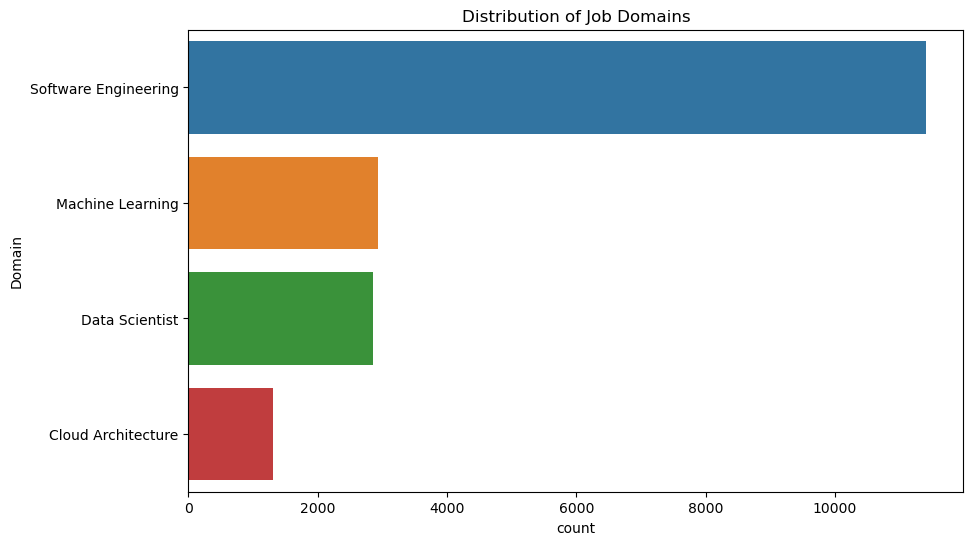

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Domain', data=df, order=df['Domain'].value_counts().index)
plt.title('Distribution of Job Domains')
plt.show()


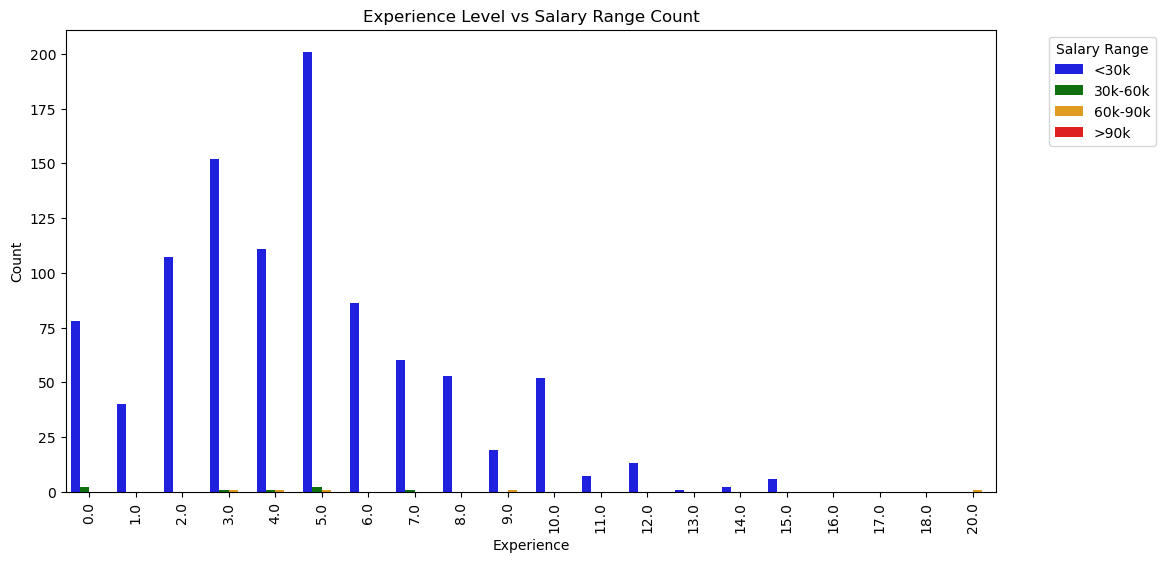

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter out rows with 'Not disclosed' salary
df_salary = df[df['Salary'] != 'Not disclosed']

# Convert Salary to numeric and create salary ranges
df_salary['Salary'] = pd.to_numeric(df_salary['Salary'], errors='coerce')
bins = [0, 30000, 60000, 90000, float('inf')]
labels = ['<30k', '30k-60k', '60k-90k', '>90k']
df_salary['Salary_Range'] = pd.cut(df_salary['Salary'], bins=bins, labels=labels, right=False)

# Count occurrences
salary_counts = df_salary.groupby(['Experience', 'Salary_Range']).size().reset_index(name='Count')

# Define a color palette
color_palette = {
    '<30k': 'blue',
    '30k-60k': 'green',
    '60k-90k': 'orange',
    '>90k': 'red'
}

# Map colors to Salary_Range
salary_counts['Color'] = salary_counts['Salary_Range'].map(color_palette)

plt.figure(figsize=(12, 6))
sns.barplot(x='Experience', y='Count', hue='Salary_Range', data=salary_counts,
            palette=salary_counts['Color'].tolist())
plt.xticks(rotation=90)
plt.title('Experience Level vs Salary Range Count')
plt.legend(title='Salary Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


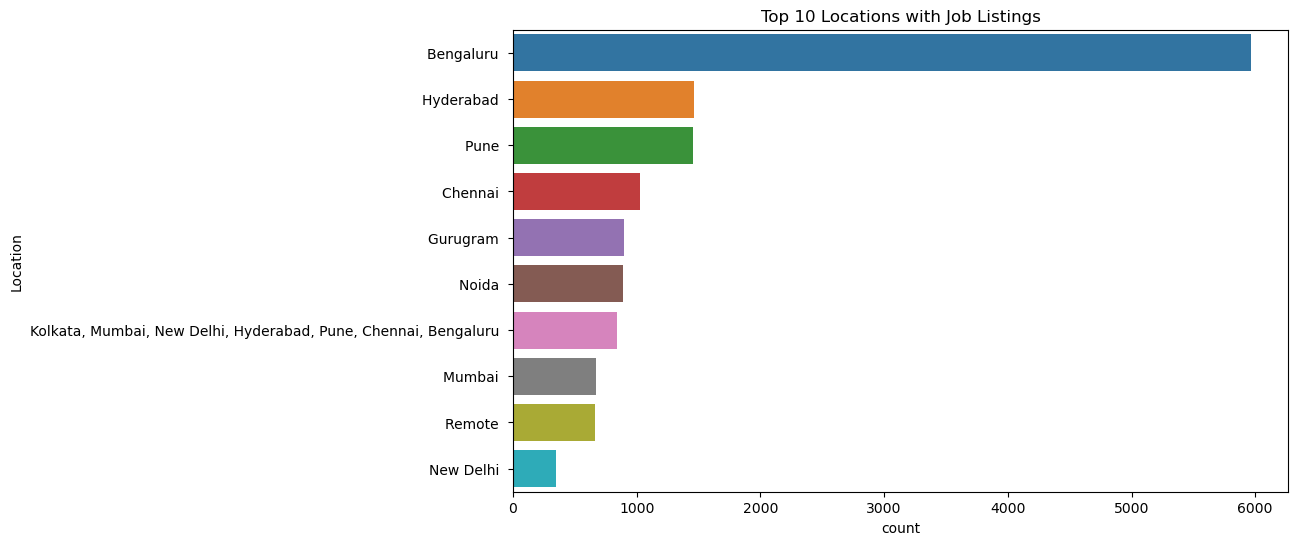

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Location', data=df, order=df['Location'].value_counts().index[:10])
plt.title('Top 10 Locations with Job Listings')
plt.show()


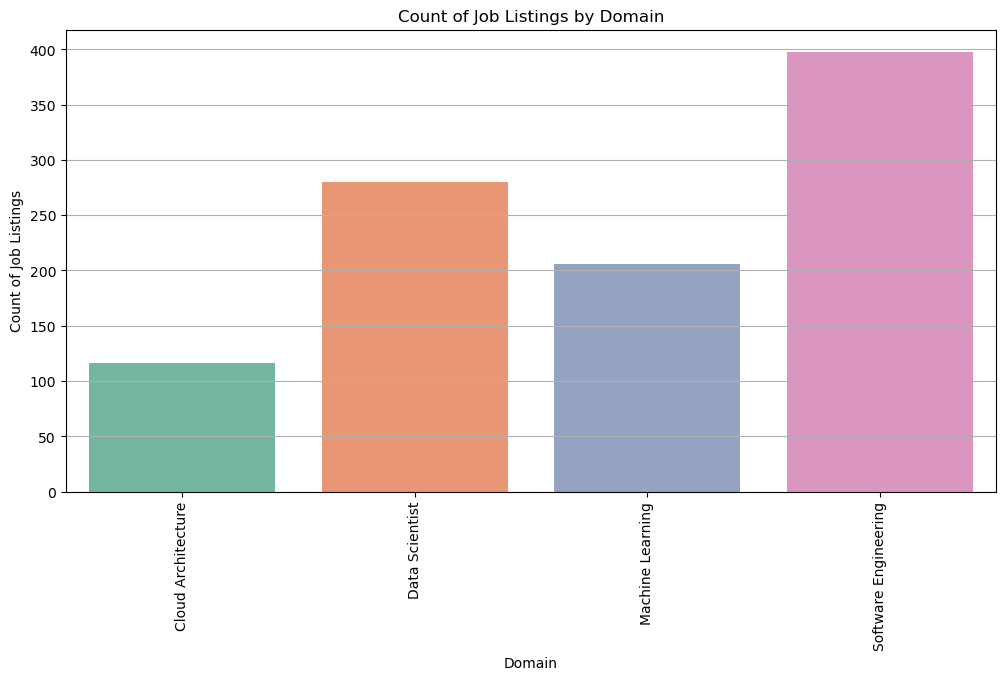

In [54]:
df_salary = df[df['Salary'] != 'Not disclosed']

# Convert Salary to numeric
df_salary['Salary'] = pd.to_numeric(df_salary['Salary'], errors='coerce')

# Drop rows with NaN salaries after conversion
df_salary = df_salary.dropna(subset=['Salary'])

plt.figure(figsize=(12, 6))
sns.countplot(x='Domain', data=df_salary, palette='Set2')
plt.title('Count of Job Listings by Domain')
plt.xticks(rotation=90)
plt.xlabel('Domain')
plt.ylabel('Count of Job Listings')
plt.grid(axis='y')  # Optional: Add gridlines for better readability
plt.show()

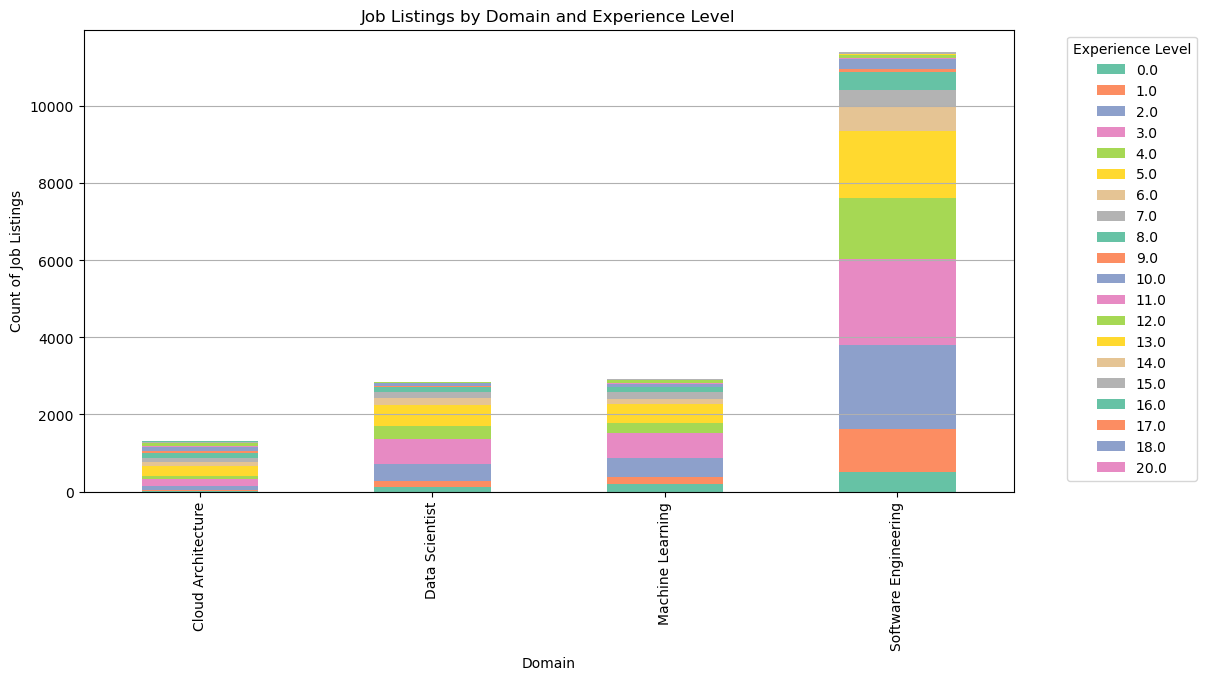

In [60]:

# Count occurrences
experience_counts = df.groupby(['Domain', 'Experience']).size().unstack(fill_value=0)

# Plotting
experience_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=sns.color_palette('Set2'))
plt.title('Job Listings by Domain and Experience Level')
plt.xlabel('Domain')
plt.ylabel('Count of Job Listings')
plt.xticks(rotation=90)
plt.legend(title='Experience Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')  # Optional: Add gridlines for better readability
plt.show()

In [15]:
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)


Missing values per column:
 Title         0
Company       0
Experience    0
Location      0
Salary        0
Skills        0
Date          0
Domain        0
dtype: int64
